In [1]:
print(" Hii, This is Sakshi Ughade")

 Hii, This is Sakshi Ughade


In [6]:

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
data = pd.read_csv('News.csv',index_col=0) 
data.head()

,title,text,subject,date,class
0.0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0.0
1.0,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0.0
2.0,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0.0
3.0,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0.0
4.0,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0.0


In [3]:
data.shape

(44940, 5)

In [7]:
data = data.drop(["title", "subject","date"], axis = 1)

In [9]:
data.isnull().sum()

text     21
class    42
dtype: int64

In [11]:
# Shuffling 
data = data.sample(frac=1) 
data.reset_index(inplace=True) 
data.drop(["index"], axis=1, inplace=True) 
data.head()

,text,class
0,BARCELONA (Reuters) - Catalonia s leader balke...,1.0
1,21st Century Wire says In typical NDAA signing...,0.0
2,Something extraordinary happened that is certa...,0.0
3,WASHINGTON (Reuters) - U.S. Transportation Sec...,1.0
4,(Reuters) - A U.S. lawmaker has called for a c...,1.0


<Axes: xlabel='class', ylabel='count'>

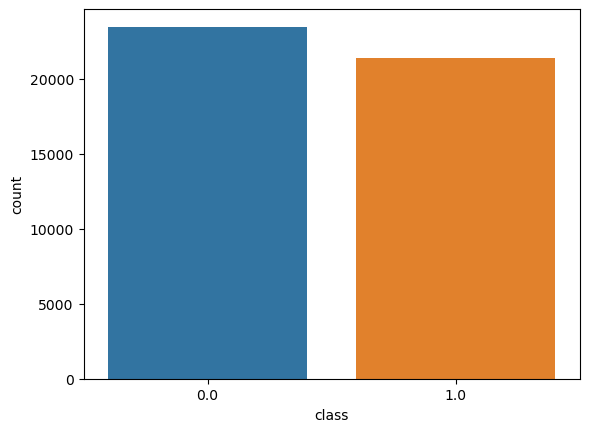

In [12]:
sns.countplot(data=data, 
			x='class', 
			order=data['class'].value_counts().index)


In [ ]:
from tqdm import tqdm 
import re 
import nltk 
# nltk.download('punkt') 
# nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud


In [26]:
# !pip install regex

In [25]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords

# Make sure you have downloaded the stopwords dataset
nltk.download('stopwords')

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        # Convert non-string types to empty strings
        if not isinstance(sentence, str):
            sentence = ''

        # Remove punctuation
        sentence = re.sub(r'[^\w\s]', '', sentence)

        # Remove stopwords and convert to lowercase
        preprocessed_text.append(' '.join(token.lower()
                                for token in str(sentence).split()
                                if token not in stopwords.words('english')))

    return preprocessed_text

# Load your data (replace 'your_file.csv' with your actual file)
import pandas as pd
data = pd.read_csv('News.csv')

# Now you can preprocess the 'text' column
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 44940/44940 [2:56:44<00:00,  4.24it/s]      


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 469.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 656.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 514.3 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 573.4 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 724.0 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/300.2 kB 741.6 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 743.4 kB/s eta 0:00:00


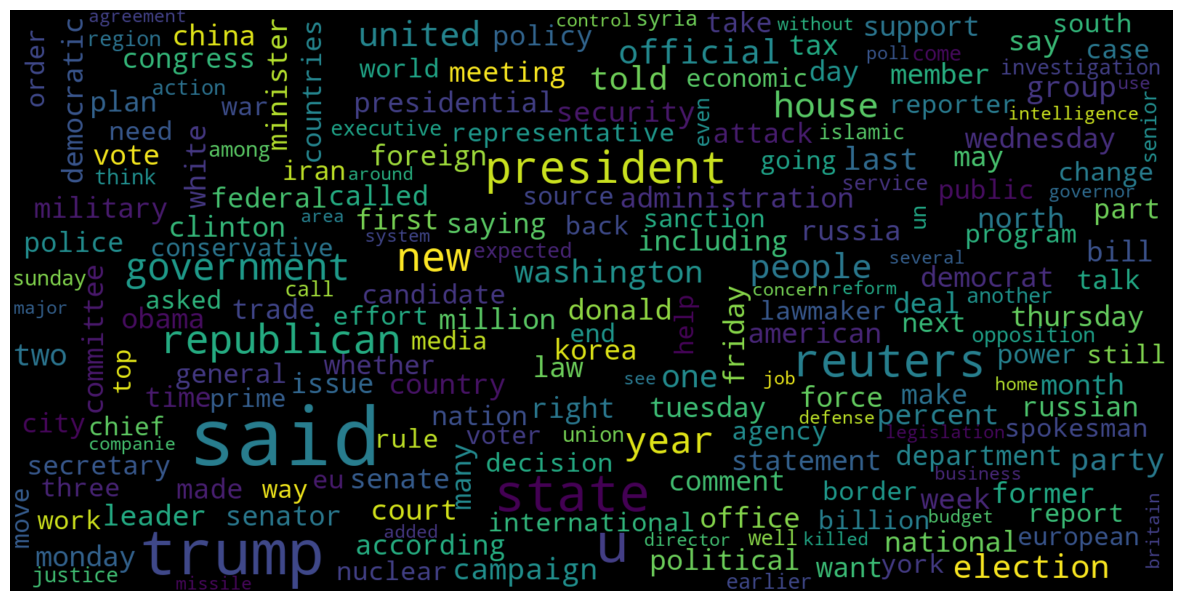

In [28]:
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Real 
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))

wordCloud = WordCloud(
    width=1600,
    height=800,
    random_state=21,
    max_font_size=110,
    collocations=False
)

plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()



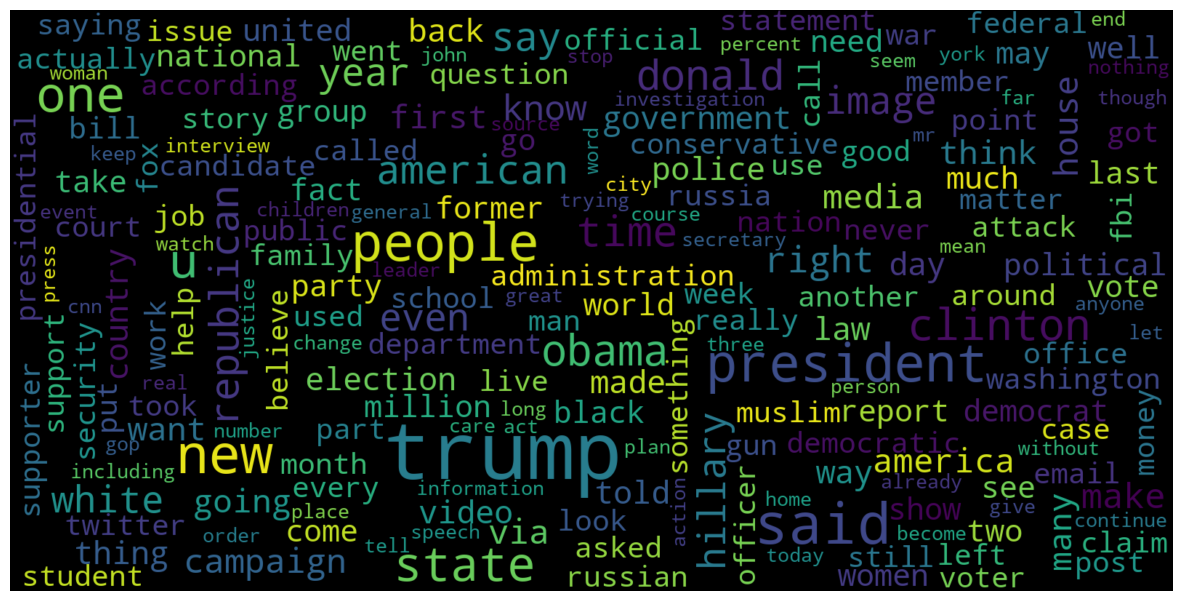

In [29]:
# Fake 
consolidated = ' '.join( 
	word for word in data['text'][data['class'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

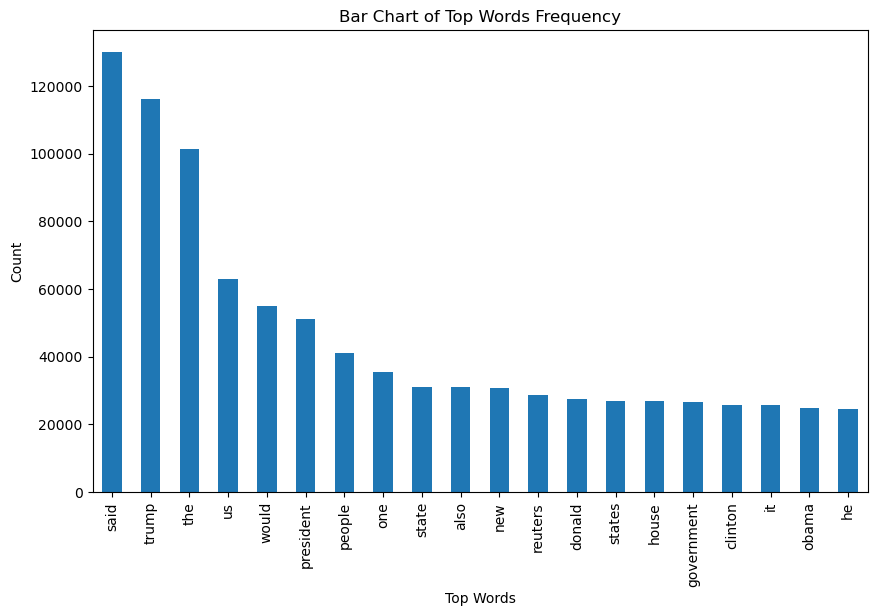

In [30]:
from sklearn.feature_extraction.text import CountVectorizer 


def get_top_n_words(corpus, n=None): 
	vec = CountVectorizer().fit(corpus) 
	bag_of_words = vec.transform(corpus) 
	sum_words = bag_of_words.sum(axis=0) 
	words_freq = [(word, sum_words[0, idx]) 
				for word, idx in vec.vocabulary_.items()] 
	words_freq = sorted(words_freq, key=lambda x: x[1], 
						reverse=True) 
	return words_freq[:n] 


common_words = get_top_n_words(data['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
	kind='bar', 
	figsize=(10, 6), 
	xlabel="Top Words", 
	ylabel="Count", 
	title="Bar Chart of Top Words Frequency"
) 


In [31]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 

x_train, x_test, y_train, y_test = train_test_split(data['text'], 
													data['class'], 
													test_size=0.25)


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)


In [35]:
from sklearn.impute import SimpleImputer
import numpy as np

# Convert y_train and y_test to numpy arrays before reshaping
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Fill NaN values with the most frequent value in y_train
imputer = SimpleImputer(strategy='most_frequent')
y_train = imputer.fit_transform(y_train).ravel()
y_test = imputer.transform(y_test).ravel()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


0.9938522764396662
0.9898459071880289


In [37]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier() 
model.fit(x_train, y_train) 

# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 


0.9999703008523655
0.9961699474481162


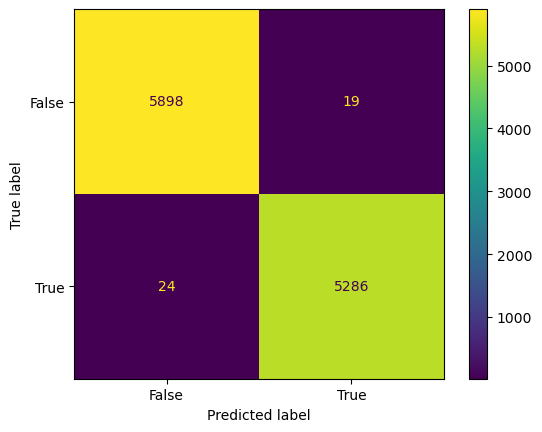

In [39]:
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
cm = metrics.confusion_matrix(y_test, model.predict(x_test)) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
											display_labels=[False, True]) 

cm_display.plot() 
plt.show() 
